# Fall 2021 Data Science Intern Challenge

### Import libraries

In [105]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

#Might as well pull in our data from the get-go.
df = pd.read_csv(r'C:\Users\David\Documents\code\Fall 2021 Data Science Intern Challenge\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

## Question 1

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

The $3145.13 figure is created by taking the average of each order -a simple AOV.

In [74]:
print('The suggested AOV', round (
    df.order_amount.mean(),
        2)
    )

The suggested AOV 3145.13


The data is skewed by one user at one shop ordering 2000 shoes at strange intervals (it's at exactly 4 am every time). This could be a seller purchasing a regular order from another shop.

I wouldn't suggest a new metric, but would certainly detect this at an early stage of data analyis and suggest that we remove the outlier.

For the record - I actually did a groupby + mean on user_id and looked at the order_amount. The next few users just love shoes and should be included (varying purchase times, low total_items).

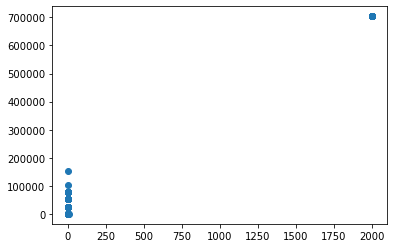

      user_id  order_amount  total_items          created_at
2153      607        704000         2000  2017-03-12 4:00:00
3332      607        704000         2000  2017-03-24 4:00:00
520       607        704000         2000  2017-03-02 4:00:00
1602      607        704000         2000  2017-03-17 4:00:00
60        607        704000         2000  2017-03-04 4:00:00
2835      607        704000         2000  2017-03-28 4:00:00
4646      607        704000         2000  2017-03-02 4:00:00
2297      607        704000         2000  2017-03-07 4:00:00
1436      607        704000         2000  2017-03-11 4:00:00
4882      607        704000         2000  2017-03-25 4:00:00


In [158]:
plt.scatter(df.total_items, df.order_amount)
plt.show()
print(df.sort_values(by='order_amount', ascending=False)[
    ['user_id', 'order_amount', 
    'total_items', 'created_at']
    ].head(10))

Let's remove that outlier and return an AOV by calculating the mean order_amount.

In [73]:
exc_df = df.loc[df.user_id != 607]

print('Our true AOV:', round (
    exc_df.order_amount.mean(),
        2)
    )

Our true AOV: 754.09


### b) What metric would you report for this dataset?

All the classic metrics used by online retailers (Average Acquisition Cost, Conversion rate, Cart abandonment rate) are unavailable on this dataset.

A quick investigation shows that although we have 5000 purchases, we only have 301 unique users. I think this is likely a flaw in how the data was generated, as it is really unlikely an individual would make multiple shoe orders in one month. Further to that, every single user is a repeat customer, which is also strange.

Nonethless, I will turn off my human brain and turn on my robot data brain because the repeat customer rate is a key metric which we can calculate. As every customer is a repeat customer, we will caluclate the repeat customer rate within each store, then take the mean. In essence, we are calculating the average repeat customer rate.

### c) What is its value?

In [152]:
def repeat_rate(shop_id):
    temp_df = df.loc[df.shop_id == shop]
    unique = list(temp_df.user_id.unique())
    no_repeat = list(users.drop_duplicates(keep=False))
    repeat = [x for x in unique if x not in no_repeat]
    return len(repeat) / len(unique)

In [153]:
df['repeat'] = df.user_id.apply(repeat_rate)

In [163]:
print('Average Repeat Customer Rate:', round(df.repeat.mean(), 2), '%.')

Average Repeat Customer Rate: 0.16 %.


## Question 2

### a) How many orders were shipped by Speedy Express in total?

#### SQL code:


SELECT  Count(OrderID) 

FROM Orders INNER JOIN Shippers 

ON Orders.ShipperID=Shippers.ShipperID 

WHERE Shippers.ShipperName == 'Speedy Express';


#### Answer:


54

### b) What is the last name of the employee with the most orders?

#### SQL code:


SELECT LastName 

FROM Orders Left JOIN Employees 

ON Orders.EmployeeID == Employees.EmployeeID

GROUP BY Employees.EmployeeID

ORDER BY Count(OrderID) DESC

LIMIT 1;


#### Answer:


Peacock

### c) What product was ordered the most by customers in Germany?

#### SQL code:


SELECT ProductName

FROM (Orders INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID

   INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID

   INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)

WHERE Customers.Country == 'Germany'

GROUP BY Products.ProductID

Order BY SUM(Quantity) DESC

LIMIT 1;

#### Answer:


Boston Crab Meat
